<a href="https://colab.research.google.com/github/Strugoeden121/ATAM1/blob/main/Major_HW1_314884602_324490135.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pylab
params = {'xtick.labelsize': 18,
 'ytick.labelsize': 18,
 'axes.titlesize' : 22,
 'axes.labelsize' : 20,
 'legend.fontsize': 18,
 'legend.title_fontsize': 22,
 'figure.titlesize': 24 }
pylab.rcParams.update(params)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [262]:
virus_data = pd.read_csv('virus_data.csv', header=0)

In [ ]:
virus_data.shape



(1250, 26)

In [ ]:
virus_data['conversations_per_day'].value_counts()

3     224
2     215
4     190
5     156
6     111
1     104
8      72
7      60
9      39
10     23
11     19
12     12
13      9
14      6
17      4
15      2
16      2
19      1
22      1
Name: conversations_per_day, dtype: int64

In [ ]:
virus_data_train, virus_data_test = train_test_split(virus_data, test_size=0.2, random_state=37)

In [ ]:
csv_file_path = 'output.csv'
virus_data_train.to_csv(csv_file_path, index=False)

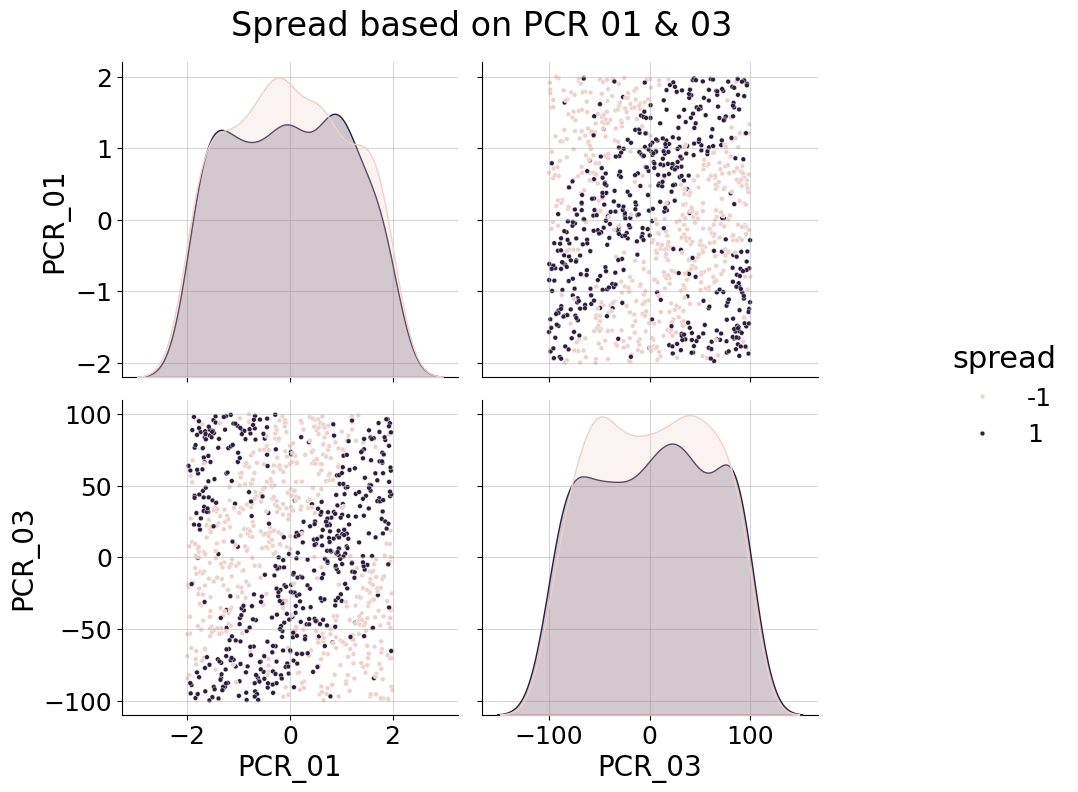

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

virus_data_training = pd.read_csv("output.csv")
g=sns.pairplot(virus_data_training, hue="spread", plot_kws={"s": 12},
               x_vars=["PCR_01", "PCR_03"], y_vars=["PCR_01", "PCR_03"])
g.fig.suptitle("Spread based on PCR 01 & 03", y=1.04)
for ax in np.ravel(g.axes):
    ax.grid(alpha=0.5)

g.fig.set_size_inches(12,8)

plt.savefig('pairplot.png')

plt.show()




In [ ]:
from sklearn.base import BaseEstimator,ClassifierMixin
from scipy.spatial.distance import cdist
class kNN(BaseEstimator, ClassifierMixin):
 def __init__(self, n_neighbors:int = 3):
  self.n_neighbors = n_neighbors
  self.X_train = None
  self.Y_train = None

 def fit(self, X, y):
    self.X_train = np.array(X)
    self.Y_train = np.array(y)
    return self

 def predict(self, X):
  distances = cdist(X, self.X_train)


  nearest_neighbors = np.argpartition(distances, self.n_neighbors, axis = 1)[:,:self.n_neighbors]
  nearest_labels = self.Y_train[nearest_neighbors]


  predictions = np.sign(np.sum(nearest_labels, axis=1))


  return predictions

In [ ]:
X_train = np.array(virus_data_training[["PCR_01","PCR_03"]])
Y_train = np.array(virus_data_training[["spread"]])
X_test = np.array(virus_data_test[["PCR_01","PCR_03"]])
Y_test = np.array(virus_data_test[["spread"]])
knn1 = kNN(1)
knn1.fit(X_train, Y_train)




kNN(n_neighbors=1)

In [177]:
def visualize_clf(clf, X, Y, title,
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap

    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)

    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()

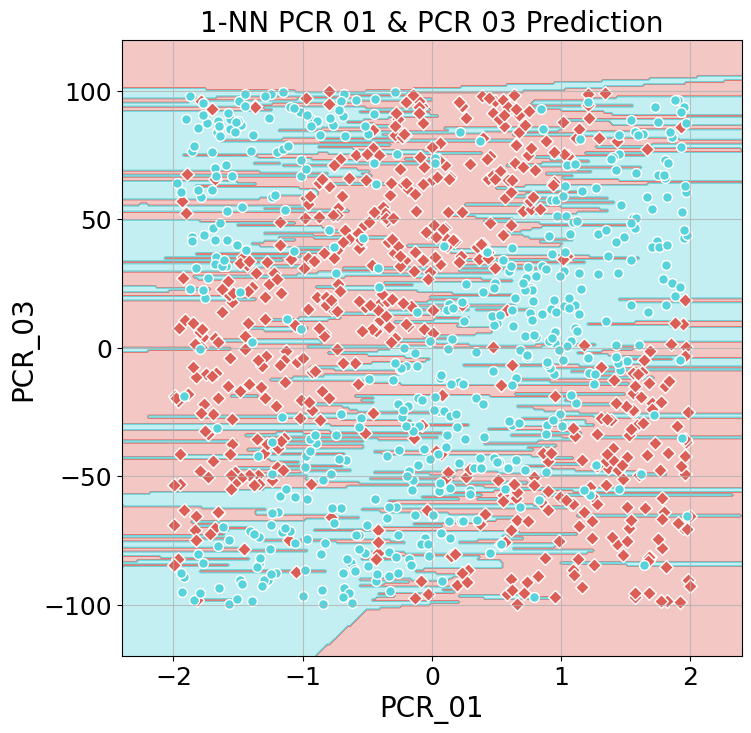

In [ ]:
visualize_clf(knn1, X_train, Y_train, "1-NN PCR 01 & PCR 03 Prediction", "PCR_01", "PCR_03")

In [ ]:
Y_pred = knn1.predict(X_test)
knn1.score(X_test, Y_test)

0.7

In [178]:
from sklearn.preprocessing import MinMaxScaler

1.0
0.776


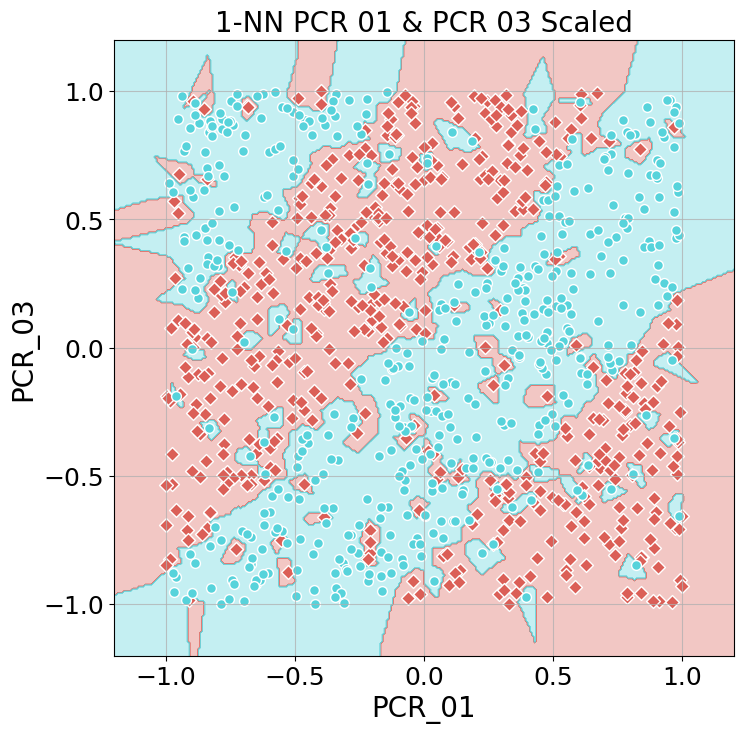

In [186]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
knn1 = kNN(1)
knn1.fit(X_train_scaled, Y_train)
Y_pred = knn1.predict(X_test_scaled)
print(knn1.score(X_train_scaled, Y_train))
print(knn1.score(X_test_scaled, Y_test))
visualize_clf(knn1, X_train_scaled, Y_train, "1-NN PCR 01 & PCR 03 Scaled", "PCR_01", "PCR_03")

0.884
0.844


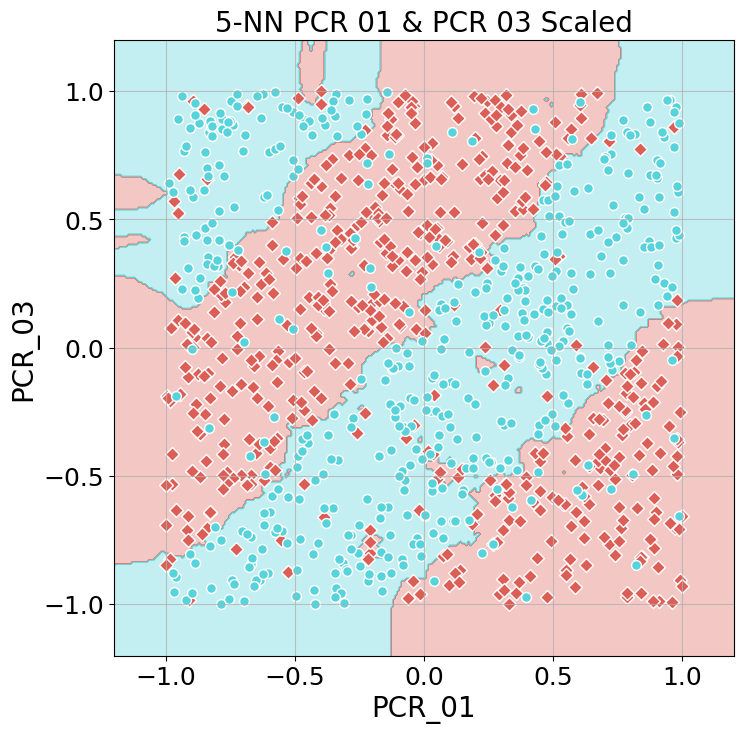

In [187]:
knn5 = kNN(5)
knn5.fit(X_train_scaled, Y_train)
Y_pred = knn5.predict(X_test_scaled)
print(knn5.score(X_train_scaled, Y_train))
print(knn5.score(X_test_scaled, Y_test))
visualize_clf(knn5, X_train_scaled, Y_train, "5-NN PCR 01 & PCR 03 Scaled", "PCR_01", "PCR_03")

In [263]:
virus_data['SpecialProperty'] = virus_data['blood_type'].isin(['O+', 'B+'])
virus_data.drop('blood_type', axis=1, inplace=True)

In [264]:
virus_data['symptoms'].value_counts()

21-04-21    6
18-06-22    5
07-12-21    5
01-03-21    5
05-11-21    5
           ..
18-04-21    1
25-05-21    1
19-05-21    1
14-08-22    1
16-02-22    1
Name: pcr_date, Length: 613, dtype: int64

In [265]:
virus_data['sore_throat'] = virus_data['symptoms'].apply(lambda x: 'sore_throat' in x.split(';')  if pd.notna(x) else False)
virus_data['cough'] = virus_data['symptoms'].apply(lambda x: 'cough' in x.split(';')  if pd.notna(x) else False)
virus_data['shortness_of_breath'] = virus_data['symptoms'].apply(lambda x: 'shortness_of_breath' in x.split(';')  if pd.notna(x) else False)
virus_data['fever'] = virus_data['symptoms'].apply(lambda x: 'fever' in x.split(';')  if pd.notna(x) else False)
virus_data['smell_loss'] = virus_data['symptoms'].apply(lambda x: 'smell_loss' in x.split(';')  if pd.notna(x) else False)
virus_data


,patient_id,age,sex,weight,current_location,num_of_siblings,happiness_score,household_income,conversations_per_day,sugar_levels,...,PCR_09,PCR_10,spread,risk,SpecialProperty,sore_throat,cough,shortness_of_breath,fever,smell_loss
0,1903,32,F,70.8,"('19.04222', '-98.11889')",3,9,1,6,122,...,7.298945,-13.627960,1,-1,True,False,False,False,False,False
1,1166,47,M,74.3,"('51.62907', '-0.74934')",2,10,2,13,109,...,5.086298,1.891701,-1,1,False,True,False,False,False,False
2,1963,36,M,91.5,"('39.12074', '27.18052')",4,11,4,6,120,...,1.713049,-11.613582,-1,1,True,False,False,False,False,False
3,856,38,M,74.4,"('40.1675', '34.37389')",1,8,2,15,93,...,0.675661,-5.757544,-1,-1,True,False,False,False,False,False
4,1808,23,F,59.7,"('48.25', '16.4')",1,10,2,3,105,...,-4.736603,-4.422387,-1,1,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,588,9,M,27.7,"('4.2475', '9.00472')",3,10,2,5,54,...,-3.091915,-13.761051,1,-1,True,False,True,True,True,False
1246,1494,56,M,74.2,"('47.80527', '-122.24064')",3,10,1,8,102,...,0.817510,-2.864392,-1,1,True,False,True,True,False,False
1247,1824,30,M,78.6,"('37.73604', '-120.93549')",2,10,3,2,106,...,-7.977065,-6.143124,-1,-1,True,False,False,False,False,False
1248,493,33,M,75.8,"('55.67938', '12.53463')",1,9,5,6,89,...,0.057740,-6.293705,-1,-1,False,False,False,False,False,False


In [268]:
virus_data['is_male'] = virus_data['sex'].isin(['M']) 21-04-21

In [269]:
virus_data['x-location'] = virus_data['current_location'].apply(lambda x: float(x.replace("(", "").replace(")", "").replace("'", "").split(", ")[0]))
virus_data['y-location'] = virus_data['current_location'].apply(lambda x: float(x.replace("(", "").replace(")", "").replace("'", "").split(", ")[1]))
virus_data['num_pcr_date'] = virus_data['pcr_date'].apply(lambda x: float(x.replace("-", "")))


In [270]:
virus_data.drop('current_location', axis=1, inplace=True)
virus_data.drop('sex', axis=1, inplace=True)
virus_data.drop('symptoms', axis=1, inplace=True)

In [271]:
virus_data.drop('pcr_date', axis=1, inplace=True)

In [272]:
virus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             1250 non-null   int64  
 1   age                    1250 non-null   int64  
 2   weight                 1250 non-null   float64
 3   num_of_siblings        1250 non-null   int64  
 4   happiness_score        1250 non-null   int64  
 5   household_income       1250 non-null   int64  
 6   conversations_per_day  1250 non-null   int64  
 7   sugar_levels           1250 non-null   int64  
 8   sport_activity         1250 non-null   int64  
 9   PCR_01                 1250 non-null   float64
 10  PCR_02                 1250 non-null   float64
 11  PCR_03                 1250 non-null   float64
 12  PCR_04                 1250 non-null   float64
 13  PCR_05                 1250 non-null   float64
 14  PCR_06                 1250 non-null   float64
 15  PCR_

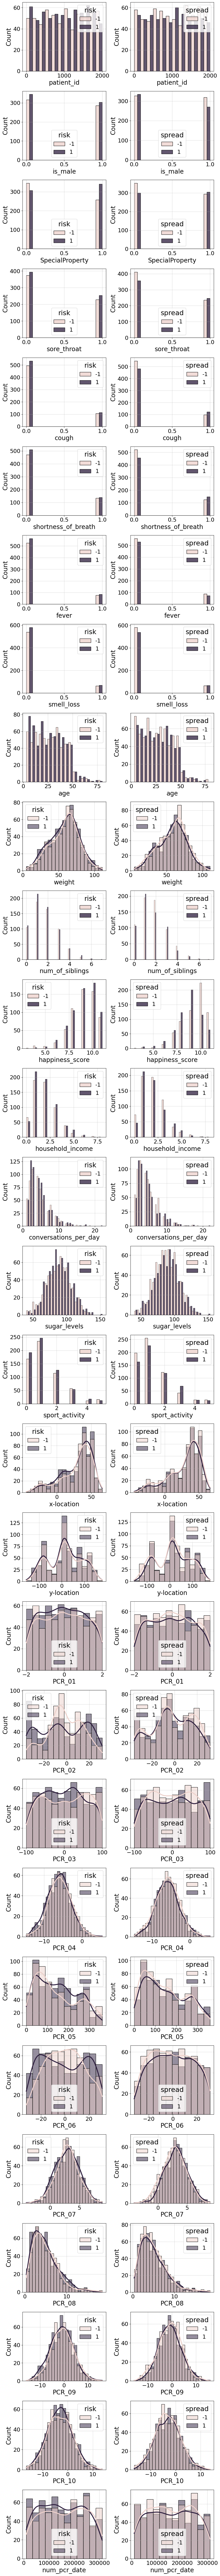

In [280]:
COL_NAME = ['patient_id', 'is_male', 'SpecialProperty', 'sore_throat', 'cough', 'shortness_of_breath', 'fever', 'smell_loss','age', 'weight', 'num_of_siblings', 'happiness_score', 'household_income', 'conversations_per_day', 'sugar_levels', 'sport_activity' ,'x-location', 'y-location', 'PCR_01','PCR_02','PCR_03','PCR_04','PCR_05','PCR_06','PCR_07','PCR_08','PCR_09','PCR_10','num_pcr_date']
COLS, ROWS = (2, len(COL_NAME))
plt.figure(figsize=(5 * COLS, 4 * ROWS))
for row in range(ROWS):
 column = COL_NAME[row]
 for j, cls in enumerate(["risk", "spread"]):
  plt.subplot(ROWS,COLS, row * COLS + 1 + j)

  isContinuous = "float" in virus_data[column].dtype.name
  sns.histplot(data=virus_data, x=column, hue=cls, line_kws={"linewidth": 3},
  kde=isContinuous, multiple="layer" if isContinuous else "dodge")
  plt.grid(alpha=0.5)
plt.tight_layout()